# Segment Anything Model (SAM)

LabelUp uses the SAM model to expand a point annotation to a semantic mask for that object. Here we will go over the basics of how to use the LabelUp SAM interface. 

Learn more about SAM here. https://segment-anything.com/ 


In [1]:
# If working directly with the code youll need to run this relative import
import sys
sys.path.append("..")


In [2]:
# Imports
from labelup.sam import SAMInference
from labelup.utils import plot_img, plot_mask
import numpy as np
import os

In [3]:
#If you have multiple GPUs you can set the specific GPU to use here - otherwise you can ignore

GPU_NUMBER= '3'
os.environ["CUDA_VISIBLE_DEVICES"] = GPU_NUMBER

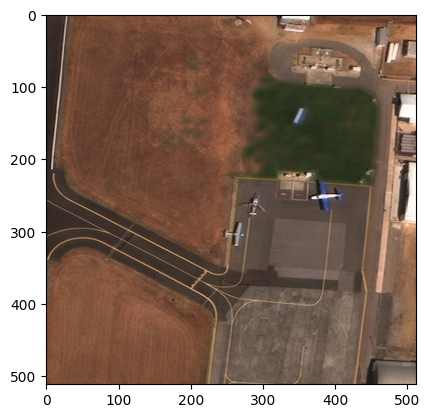

In [4]:
# select an image to annotate and view it here

imgpath = "../samples/28_1040010041747E00_tile_65.png"

plot_img(imgpath)

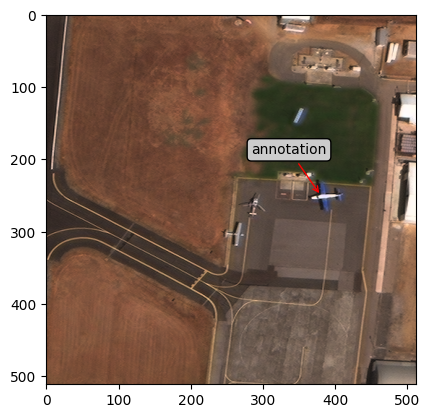

In [5]:
# select a point to annotate from and view it
x= 380
y=250
plot_img(imgpath, point= (x,y), use_arrow=True)

In [6]:
# Initialize SAM model
# download model here https://huggingface.co/spaces/abhishek/StableSAM/blob/main/sam_vit_h_4b8939.pth
MODEL_PATH= "/data/models/sam_vit_h_4b8939.pth"
sam = SAMInference(MODEL_PATH)

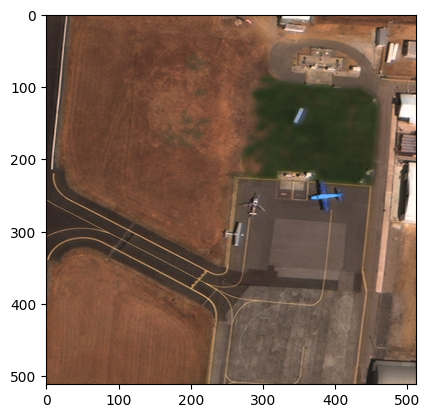

In [7]:
#run inference on the image from the point
masks = sam.predict((x,y), img_path=imgpath)

#render the predicted mask
plot_mask(imgpath, masks[0])